<a href="https://colab.research.google.com/github/Vaishnavisharan/Machine_Learning-Project/blob/main/Tesla_stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRAIES 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

LOADING DATASET 

In [ ]:
tesla=pd.read_csv('tesla.csv')

In [ ]:
tesla.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
tesla.shape

(2193, 7)

In [ ]:
tesla.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [ ]:
tesla.info

<bound method DataFrame.info of             Date        Open        High  ...       Close   Adj Close    Volume
0     29-06-2010   19.000000   25.000000  ...   23.889999   23.889999  18766300
1     30-06-2010   25.790001   30.420000  ...   23.830000   23.830000  17187100
2     01-07-2010   25.000000   25.920000  ...   21.959999   21.959999   8218800
3     02-07-2010   23.000000   23.100000  ...   19.200001   19.200001   5139800
4     06-07-2010   20.000000   20.000000  ...   16.110001   16.110001   6866900
...          ...         ...         ...  ...         ...         ...       ...
2188  11-03-2019  283.519989  291.279999  ...  290.920013  290.920013   7392300
2189  12-03-2019  286.489990  288.070007  ...  283.359985  283.359985   7504100
2190  13-03-2019  283.899994  291.989990  ...  288.959991  288.959991   6844700
2191  14-03-2019  292.450012  295.390015  ...  289.959991  289.959991   7074200
2192  15-03-2019  283.510010  283.723999  ...  275.429993  275.429993  14758243

[2193 r

In [ ]:
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [ ]:
print(f'dataframe contains stock price between {tesla.Date.min()}{tesla.Date.max()}')
print(f'total days={(tesla.Date.max() - tesla.Date.min()).days}days')

dataframe contains stock price between 2010-01-07 00:00:002019-12-03 00:00:00
total days=3617days


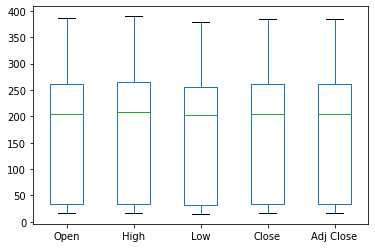

In [ ]:
tesla[['Open' ,'High'	, 'Low'	, 'Close'	, 'Adj Close']].plot(kind='box')

ASSIGNING THE X AND Y VALUES 

In [ ]:
x=np.array(tesla.index).reshape(-1,1)
y=tesla['Close']

SPLITTING  TRAIN AND TEST DATASET 

In [ ]:
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=4)

STANDARDISE THE DATA SET 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler().fit(x_train)

LINEAR REGRESSION 

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [ ]:
lr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('slope', np.asscalar(np.squeeze(lr.coef_)))
print('intercept',lr.intercept_)

slope 0.1689130417462431
intercept -10.300873932802347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


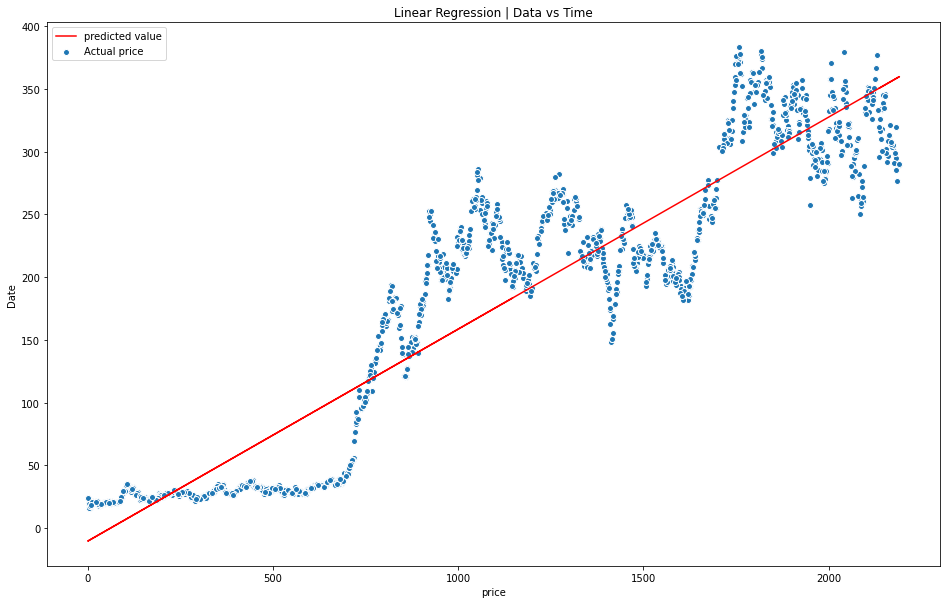

In [ ]:
plt.figure(1,figsize=(16,10))
plt.title('Linear Regression | Data vs Time')
plt.scatter(x_train,y_train,edgecolors='w',label='Actual price')
plt.plot(x_train,lr.predict(x_train),color='r',label='predicted value')
plt.xlabel('price')
plt.ylabel('Date')
plt.legend()
plt.show()

SCORES 


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2score

In [ ]:
scores=f'''
{'metric'.ljust(10)}{'train'.center(20)}{'test'.center(20)}
{'r2_Score'.ljust(10)}{r2score(y_train,lr.predict(x_train))}\t{r2score(y_test,lr.predict(x_test))}
{'mse'.ljust(10)}{mse(y_train,lr.predict(x_train))}\t{mse(y_test,lr.predict(x_test))}
'''

print(scores)


metric           train                test        
r2_Score  0.8607335348368219	0.8727361273188348
mse       1838.1222306823079	1742.9261627702726

